<a href="https://colab.research.google.com/github/rdambrosioz/aa_2021/blob/main/aa_tareaFinal_costanzo_dambrosio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TAREA FINAL DE APRENDIZAJE AUTOMÁTICO**
## Universidad de Montevideo
## Ing. en Infórmatica - Sem 2, 2021
### Docente: Sebastián Garcia


## Grupo 2:
* Bruno Costanzo
* Renzo D'Ambrosio

# PARTE 1

Efectúe un profundo EDA del dataset entregado. En caso de que existan dudas de la semántica de alguno de los features del dataset, se recomienda fuertemente investigar sobre el mismo y documentar el resultado.

In [ ]:
import sklearn as s
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import plotly.express as px

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

In [ ]:
df_hf = pd.read_csv('https://raw.githubusercontent.com/rdambrosioz/aa_2021/main/heart_failure_clinical_records_dataset.csv', sep=',')
df_hf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
features = df_hf.columns[0:-1]
features, df_hf.dtypes

(Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
        'ejection_fraction', 'high_blood_pressure', 'platelets',
        'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
       dtype='object'), age                         float64
 anaemia                       int64
 creatinine_phosphokinase      int64
 diabetes                      int64
 ejection_fraction             int64
 high_blood_pressure           int64
 platelets                   float64
 serum_creatinine            float64
 serum_sodium                  int64
 sex                           int64
 smoking                       int64
 time                          int64
 DEATH_EVENT                   int64
 dtype: object)

Podemos ver que el dataset cuenta con 13 variables y 299 pacientes, a modo de aclaración estos datos fueron recabados en 2015. 

A continuación vamos a ver cada uno de los atributos, son todos de tipo int, salvo platelets y serum_creatinine que son tipo float.

1.   Age: Edad del paciente
2.   Anaemia: afección en la cual careces de suficientes glóbulos rojos sanos para transportar un nivel adecuado de oxígeno a los tejidos del cuerpo.
3.   creatinine_phosphokinase (Creatina fosfocinasa): enzima que está presente en el cuerpo. Se encuentra predominantemente en el corazón, el cerebro y el músculo esquelético
4.   Diabetes: enfermedad en la que los niveles de glucosa (azúcar) de la sangre están muy altos.
5.   ejection_fraction (Fracción de Eyección): medición, expresada como un porcentaje, de la cantidad de sangre que el ventrículo izquierdo bombea hacia fuera con cada contracción. 
6.   high_blood_pressure (Presion arterial alta): afección frecuente en la que la fuerza que ejerce la sangre contra las paredes de tus arterias con el transcurso del tiempo es lo suficientemente alta como para poder causarte problemas de salud, como una enfermedad cardíaca
7.   platelets (Plaquetas): fragmentos de células muy grandes de la médula ósea que se llaman megacariocitos. Ayudan a producir coágulos sanguíneos para hacer más lento el sangrado o frenarlo y para facilitar la cicatrización de las heridas
8.   serum_creatinine (Suero de Creatinina): compuesto químico que resulta de los procesos de producción de energía de los músculos
9.   serum_sodium (Sodio serico): Cantidad de sodio en la sangre. Es necesario para que las celulas del cuertpo funcionen correctamente.
10.   sex (sexo): 0 indica paciente mujer y 1 indica paciente hombre
11.   smoking (fuma): indica si el paciente es fumador o no
12.   time (tiempo): Período de seguimiento en días
13.   death_event (Evento de muerte): Indica si el paciente murio durante el periodo de seguimiento.

In [ ]:
df_hf.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df_hf.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Como podemos apreciar, el dataset no tiene valores nulos.

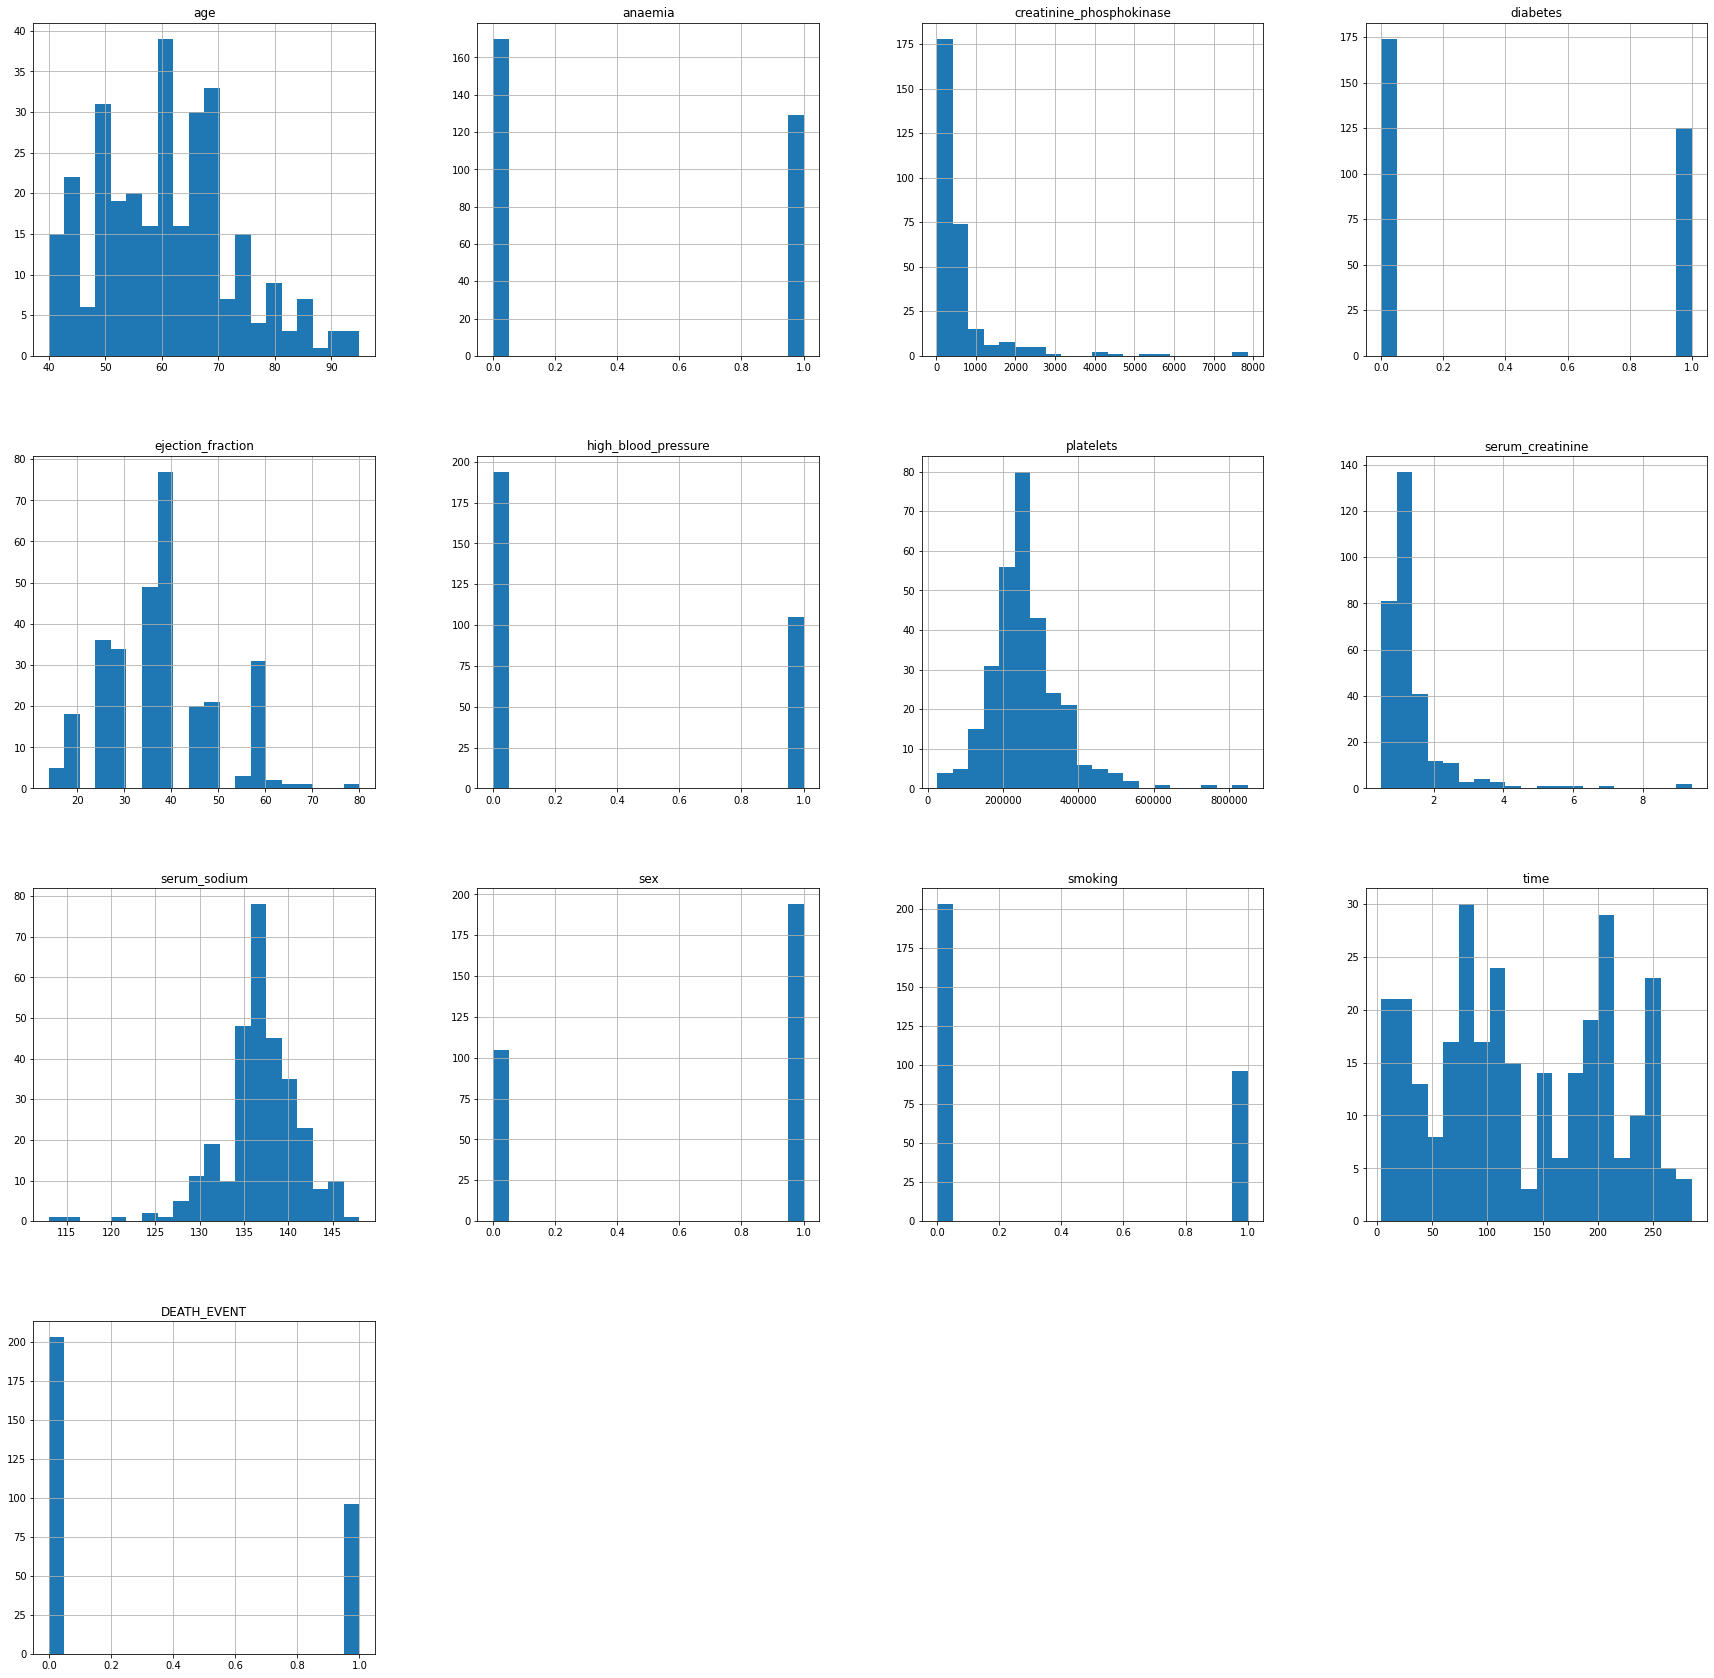

In [ ]:
df_hf.hist(figsize=(30,30), bins=20)
plt.show()

El objetivo de realizar estos histogramas es poder ver las distintas distribuciones de los features. 

Además, no parece haber features que tengan grandes problemas con puntos fuera de la distribución. Es decir, no parecieran haber outliers.

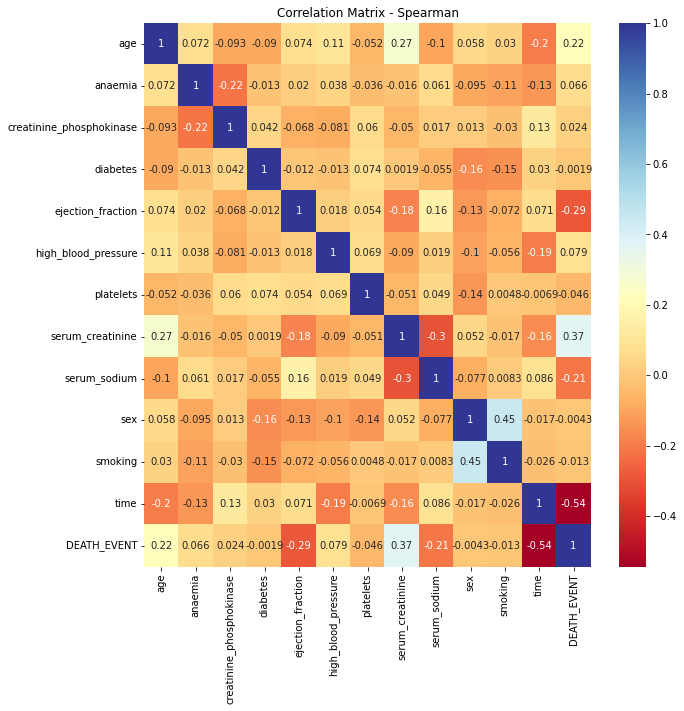

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_hf.corr(method='spearman'), annot=True, cbar=True, cmap='RdYlBu')
plt.title('Correlation Matrix - Spearman')
plt.show()

Aquí se presentan graficamente las matrices de correlacion de los feature. En particular se utilizá la métrica de correlación de Spearmann

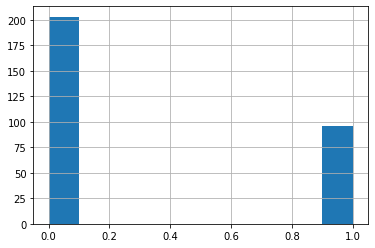

In [ ]:
df_hf['DEATH_EVENT'].hist()

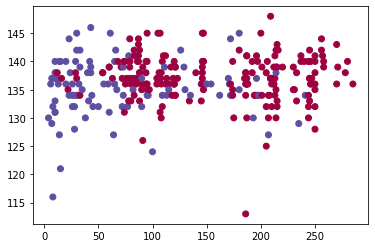

In [ ]:
plt.scatter(df_hf['time'], df_hf['serum_sodium'], c=df_hf['DEATH_EVENT'], cmap=plt.cm.get_cmap('Spectral', 2))

In [ ]:
df = px.data.iris()
fig = px.scatter_3d(df_hf, x='time', y='serum_sodium', z='ejection_fraction',
              color='DEATH_EVENT')
fig.show()

En esta parte se hace especial enfasis en el atributo 'DEATH_EVENT' ya que es el más importante para el desarrollo de este trabajo.

In [ ]:
data = df_hf.drop(axis=1, columns='DEATH_EVENT').values
pca = PCA(n_components=3)
pca.fit(data)
data_PCA = pca.transform(data)

In [ ]:
expl = pca.explained_variance_ratio_
print('Primeros 3 PCA:',sum(expl[0:3]))

Primeros 3 PCA: 0.9999999693653626


In [ ]:
df_pca = pd.DataFrame(data_PCA)
df_pca['DEATH_EVENT'] = df_hf['DEATH_EVENT']
df = px.data.iris()
fig = px.scatter_3d(df_pca, x=0, y=1, z=2,
              color='DEATH_EVENT')
fig.show()

# PARTE 2

Utilizando las técnicas vistas en el curso, detecte las características de las poblaciones con mayor riesgo de muerte producto de un accidente cardiovascular

Si bien podriamos interpretar algunas caracterisiticas de la poblacion con riesgo de muerte a partir del EDA y de la interrelacion de las variables, resulta interesante ir un poco mas a fondo e intentar aplicar algunas de las tecnicas de ML para obtener mas informacion acerca de los datos.

## KMEANS

Identificar cluster de 1s y ver características

La primer idea que planteamos es clusterizar los datos. La idea sería, en el caso de que los datos de personas con riesgo y sin riesgo de muerte queden en clusters distintos, poder entender las características de cada grupo a partir de la distribución de los clusters.

### Buscamos mejor cluster

In [ ]:
df_features = df_hf.drop(axis=1, columns='DEATH_EVENT').values

In [ ]:
inertias = []
silhouettes = []
for i in range(2,20):
  kmeans = KMeans(n_clusters=i, max_iter=300, algorithm='elkan') 
  kmeans.fit(df_features)
  inertias += [kmeans.inertia_]
  silhouettes += [silhouette_score(df_features,kmeans.labels_)]
  cluster = []

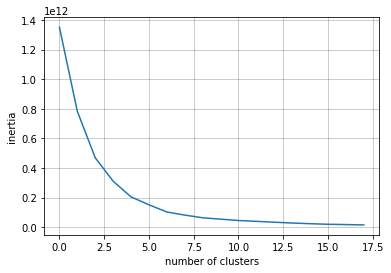

In [ ]:
plt.plot(inertias)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.grid(color='k', linestyle='-', linewidth=0.5, alpha=0.4)
plt.show()

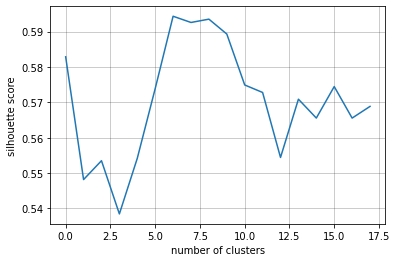

In [ ]:
plt.plot(silhouettes)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.grid(color='k', linestyle='-', linewidth=0.5, alpha=0.4)
plt.show()

Estudiamos las métricas para las distitnas cantidades de clusters. Vemos que utilizando 2 clusters tendríamos métricas aceptables. Ademas, sería muy bueno tener solamente dos clusters ya que deseamos separar a la población en 2 grupos.

In [ ]:
kmeans = KMeans(n_clusters=2, max_iter=500, algorithm='elkan') 
kmeans.fit(df_features)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
cluster = []
for instance in df_features:
  cluster += [kmeans.predict(instance.reshape(-1, len(instance)))]

df_hf['Cluster'] = [i[0] for i in cluster]

In [ ]:
df_hf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Cluster
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,0
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,1
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,0


### Visualizamos los resultados

Visualizamos los clusters utilizando PCA.

In [ ]:
pca = PCA(n_components=2)
pca.fit(df_features)
data_PCA_2comp = pca.transform(df_features)

scaler = MinMaxScaler()
data_PCA_2comp = scaler.fit_transform(data_PCA_2comp)

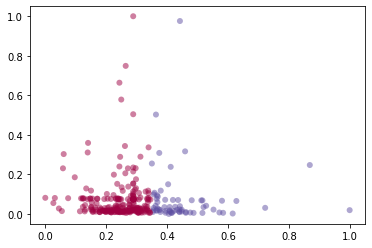

In [ ]:
plt.scatter(data_PCA_2comp[:,0], data_PCA_2comp[:,1], c=df_hf['Cluster'], edgecolor='none', alpha=0.5,
              cmap=plt.cm.get_cmap('Spectral', 6))

In [ ]:
df_hf.groupby(by=['DEATH_EVENT', 'Cluster'])['DEATH_EVENT', 'Cluster'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



DEATH_EVENT  Cluster
DEATH_EVENT Cluster                      
0           0                162      162
            1                 41       41
1           0                 72       72
            1                 24       24

Observando las clasificaciones decidimos que el cluster 0 este asociado a DEATH_EVENT=0 y el otro cluster con la otra clase. Esto minimiza el error. 

Vemos que la recall de la clase 1 es baja. Esto es preocupante ya que son las instancias que se querrian predecir con mayor exactitud.

In [ ]:
df_hf['Predictions'] = df_hf.apply(lambda x : (0 if x.Cluster == 0 else 2) if x.DEATH_EVENT == 0 else (1 if x.Cluster == 1 else 3), axis=1)

Damos una interpretación distitna a la columna Prediction.

Tenemos:
* 0: Se predijo cluster *0* y se tiene *DEATH_EVENT=0*
* 1: Se predijo cluster *1* y se tiene *DEATH_EVENT=1*
* 2: Se predijo cluster *1* y se tiene *DEATH_EVENT=0*
* 3: Se predijo cluster *0* y se tiene *DEATH_EVENT=1*

In [ ]:
df = px.data.iris()
fig = px.scatter_3d(df_hf, x='time', y='serum_sodium', z='ejection_fraction',
              color='Predictions')
fig.show()

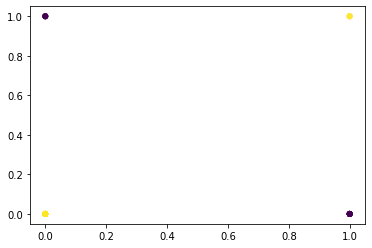

In [ ]:
plt.scatter(df_hf['DEATH_EVENT'], df_hf['Cluster'], c=df_hf['Cluster']==df_hf['DEATH_EVENT'], edgecolor='none', alpha=0.1,
              cmap='viridis')

In [ ]:
(df_hf['Cluster']==df_hf['DEATH_EVENT']).sum()

186

In [ ]:
sum([1 for i in df_hf['Predictions']==0 if i]) + sum([1 for i in df_hf['Predictions']==1 if i]), df_hf.shape[0]

(186, 299)

La cantidad de instancias clasificadas correctamente son el 62%

### Resumen de los resultados

Observando graficamente los resultados, vemos que el modelo no presenta una buena separación de los datos.
Más aún, la precisión del modelo es bastante baja. Por lo tanto, se decide descartar este analisis, ya que no identifica bien a las distitnas poblaciones. Por ende, no sería valedero caracterizarlas a partir de esta separación.

## SelectKBest (Chi2 Selector)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc


In [ ]:
df_hf = df_hf.drop(axis=0, columns=['Cluster', 'Predictions'])
df_hf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
df_train, df_test = train_test_split(df_hf, test_size=0.2)
n_features = 12
X_train = df_train.drop(axis = 0, columns= 'DEATH_EVENT')
X_test = df_test.drop(axis = 0, columns= 'DEATH_EVENT')
Y_train = df_train['DEATH_EVENT']
Y_test = df_test['DEATH_EVENT']

Dividimos el dataset en 80% para entrenamiento y 20% para el testeo.

In [ ]:
from sklearn.metrics import recall_score
def get_scores(Y_pred, probs, Y_test, plot=True):

  # Calcular TP, TN, FP, FN
  # Armar matriz de cofusion
  # Recall, Precision, Accuracy, F1
  # AUC
  # probas = model.predict_proba(X_test)
  fpr, tpr, thresholds = roc_curve(Y_test,probs[:,1])
  if plot:
    plt.plot([0,1],[0,1],'k--') #se grafica la linea diagonal
    plt.plot(fpr, tpr, label='NB') #se grafica la curva ROC
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.show()
    print("AUC: {}" .format(auc(fpr, tpr)))

  accuracy = accuracy_score(Y_test, Y_pred)
    
  
  mat = confusion_matrix(Y_test, Y_pred)
  if plot:
    print (classification_report(Y_test,Y_pred))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Clase de test')
    plt.ylabel('Clase de la predicción');

  recall = recall_score(Y_test, Y_pred)

  return accuracy, recall

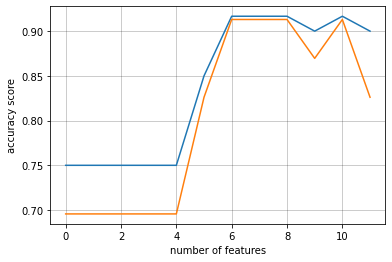

[0.75,
 0.75,
 0.85,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9,
 0.9166666666666666,
 0.9]

In [ ]:
acu = []
rec= []

model = LogisticRegression(class_weight='balanced', max_iter=500, solver='liblinear', penalty='l2')

for i in range(3, n_features):
  
  selector = SelectKBest(chi2, k=i)
  pipe = Pipeline([('fselector', selector), ('lr', model)])
  pipe.fit(X_train, Y_train)
  new_Y_pewd = pipe.predict_proba(X_test)
  Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
  res = get_scores(Y_pred, new_Y_pewd, Y_test,False)
  acu += [res[0]]
  rec += [res[1]]

plt.plot([acu[0]]*3+acu)
plt.plot([rec[0]]*3+rec)
plt.xlabel('number of features')
plt.ylabel('accuracy score')
plt.grid(color='k', linestyle='-', linewidth=0.5, alpha=0.4)
plt.show()
acu

Graficamos la accuracy en función del numero de features para encontrar que cantidad de features nos da el mejor resultado. En este caso en particular vemos que es con 6 features.

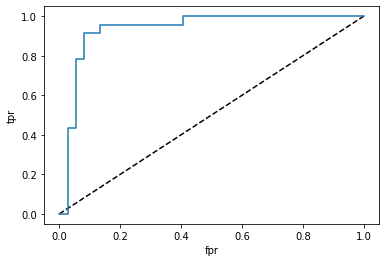

AUC: 0.9353701527614571
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        37
           1       0.88      0.91      0.89        23

    accuracy                           0.92        60
   macro avg       0.91      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60



('Accuracy/Recall', (0.9166666666666666, 0.9130434782608695))

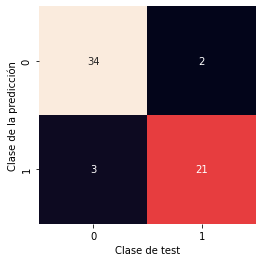

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=500, solver='liblinear')

pipe = Pipeline([('fselector', SelectKBest(chi2, k=6)), ('lr', model)])
pipe.fit(X_train, Y_train)
new_Y_pewd = pipe.predict_proba(X_test)

# new_Y_pewd = model.predict_proba(X_test)
umbral_prob = 0.5
Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
'Accuracy/Recall', get_scores(Y_pred, new_Y_pewd, Y_test,True)

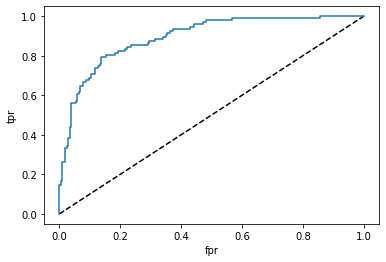

AUC: 0.8932676518883416
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       203
           1       0.69      0.80      0.74        96

    accuracy                           0.82       299
   macro avg       0.80      0.82      0.80       299
weighted avg       0.83      0.82      0.83       299



('Accuracy', (0.822742474916388, 0.8020833333333334))

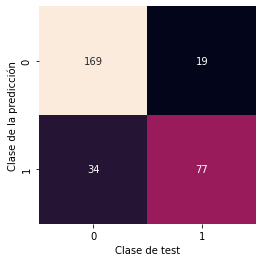

In [ ]:
new_Y_pewd = pipe.predict_proba(df_hf.drop(axis = 0, columns= 'DEATH_EVENT'))

# new_Y_pewd = model.predict_proba(X_test)
umbral_prob = 0.5
Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
'Accuracy', get_scores(Y_pred, new_Y_pewd, df_hf['DEATH_EVENT'],True)

In [ ]:
f_indices = pipe.named_steps['fselector'].get_support(indices=True)
features = df_hf.columns.values[f_indices]
features

array(['age', 'creatinine_phosphokinase', 'ejection_fraction',
       'platelets', 'serum_creatinine', 'time'], dtype=object)

Aca obtenemos los features que son utilizados por el Chi2 selector, estos los vamos a comparar con los que obtendremos en el modelo RFE para luego realizar la Parte 3.

In [ ]:
df_pos = df_hf.where(df_hf['DEATH_EVENT']==1).dropna()
df_neg = df_hf.where(df_hf['DEATH_EVENT']==0).dropna()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/

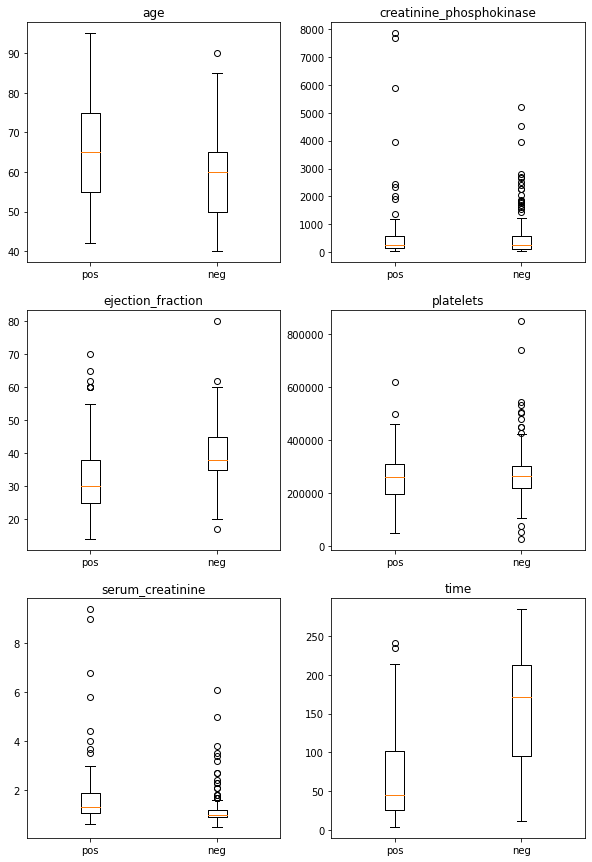

In [ ]:
f, ax = plt.subplots(3,2, figsize=(10,15))
i = 0
for j in range(3):
  for a in ax[j]:
    feature = features[i]
    pos = df_pos[feature]
    neg = df_neg[feature]
    dict_age = {'pos':pos.values, 'neg':neg.values}

    a.boxplot(dict_age.values())
    a.set_xticklabels(dict_age.keys())
    a.set_title(feature)

    i+=1


Vemos la distribución de los features que son utilizados en el modelo.

## RFE

A continuación vamos a explicar que es el RFE (recursive feature elimination)

Dado un estimador externo que asigna pesos a los features (por ejemplo, los coeficientes de un modelo lineal), el objetivo de la eliminación de características recursivas (RFE) es seleccionar features considerando recursivamente conjuntos de features cada vez más pequeños. Primero, el estimador se entrena en el conjunto inicial de features y la importancia de cada feature se obtiene a través de cualquier atributo específico o invocable. Luego, los features menos importantes se eliminan del conjunto de features actual. Ese procedimiento se repite de forma recursiva en el conjunto podado hasta que finalmente se alcanza el número deseado de features para seleccionar.

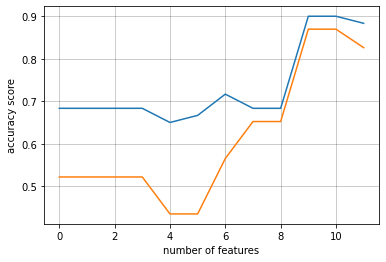

[0.6833333333333333,
 0.65,
 0.6666666666666666,
 0.7166666666666667,
 0.6833333333333333,
 0.6833333333333333,
 0.9,
 0.9,
 0.8833333333333333]

In [ ]:
acu = []
rec= []

model = LogisticRegression(class_weight='balanced', max_iter=500, solver='liblinear', penalty='l2')

for i in range(3, n_features):
  
  rfe = RFE(model,n_features_to_select=i)
  pipe = Pipeline([('rfe', rfe)])
  pipe.fit(X_train, Y_train)
  new_Y_pewd = pipe.predict_proba(X_test)
  Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
  res = get_scores(Y_pred, new_Y_pewd, Y_test,False)
  acu += [res[0]]
  rec += [res[1]]

plt.plot([acu[0]]*3+acu)
plt.plot([rec[0]]*3+rec)
plt.xlabel('number of features')
plt.ylabel('accuracy score')
plt.grid(color='k', linestyle='-', linewidth=0.5, alpha=0.4)
plt.show()
acu

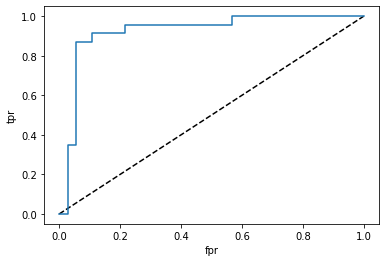

AUC: 0.9236192714453584
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        37
           1       0.87      0.87      0.87        23

    accuracy                           0.90        60
   macro avg       0.89      0.89      0.89        60
weighted avg       0.90      0.90      0.90        60



(0.9, 0.8695652173913043)

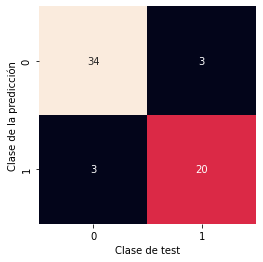

In [ ]:
rfe = RFE(model,n_features_to_select=9)
pipe = Pipeline([('rfe', rfe)])
pipe.fit(X_train, Y_train)
new_Y_pewd = pipe.predict_proba(X_test)
Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
get_scores(Y_pred, new_Y_pewd, Y_test,True)

In [ ]:
rfe_indices = pipe['rfe'].get_support(indices=True)
rfe_features = df_hf.columns.values[f_indices]
rfe_features

array(['age', 'creatinine_phosphokinase', 'ejection_fraction',
       'platelets', 'serum_creatinine', 'time'], dtype=object)

Vemos que obtimos los mismos 6 features que utilizando el Chi2 selector del modelo anterior por lo que podemos afirmar que estos 6 son los más importantes para analizar.

# PARTE 3

Para las poblaciones de mayor riesgo, en función de las respuestas obtenidas en el formulario de alta, determine el conjunto de resultados clínicos que el potencial asegurado debe entregar para avanzar en el proceso de obtención de la póliza.

Utilizamos los resultados de SelctKBest y de RFE. Vemos que ambos coinciden en cuales deberían ser los features utilizados

In [ ]:
features, rfe_features

(array(['age', 'creatinine_phosphokinase', 'ejection_fraction',
        'platelets', 'serum_creatinine', 'time'], dtype=object),
 array(['age', 'creatinine_phosphokinase', 'ejection_fraction',
        'platelets', 'serum_creatinine', 'time'], dtype=object))

In [ ]:
final_features = []

for i in features:
  if i in rfe_features:
    final_features += [i]

In [ ]:
final_features

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'time']

A partir de estos datos. Identificamos cuales valores podrían ser conocidos a partir de un examen.

En el caso particular de *time* entendemos que bastaría solamente con realizar una pregunta extra en el formulario al cliente.

Para *creatinine_phosphokinase* se podría realizar un examen medico extrayendo sangre, tal como lo indica https://www.mountsinai.org/health-library/tests/creatine-phosphokinase-test#:~:text=Blood%20is%20drawn%20from%20a,depending%20on%20the%20specific%20test.

Luego, para medir la *ejection_fraction* se podrían utilizar algunos de los examenes indicados en https://my.clevelandclinic.org/health/articles/16950-ejection-fraction como un electrocardiograma o una resonancia magnetica.

Para medir el nivel de *platelets*, se sabe que se puede realizar un sencillo analisis de sangre. De todas formas, detalles pueden ser vistos en https://medlineplus.gov/lab-tests/platelet-tests/#:~:text=Most%20platelet%20tests%20are%20done,a%20test%20tube%20or%20vial.

Finalmente, para medir el nivel de *serum_creatinine* tambien bastaria con un analisis de sangre, tal como se explica en https://www.mayoclinic.org/tests-procedures/creatinine-test/about/pac-20384646.

Dicho esto, reafirmamos que estos deben ser los analisis o preguntas adicionales a realizar. Ademas, se considero que todos estos procedimientos son no invasivos o poco invasivos, por lo que no deberían generar complicaciones para el cliente. Salvo en el caso de *ejection_fraction*, todos pueden ser realizados con una extracción de sangre y son procedimientos poco costosos. En el caso de una resonancia o un electrocardiograma, suelen ser procedimientos mas costosos. Sin ebmargo, dada la alta correlación de este feature con DEATH_EVENT, tal como se vio en la parte 1, se recomendaría realizar el analisis de todos modos.

In [ ]:
exam_feautes = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'time']

# PARTE 4

Para el conjunto de respuestas obtenidas en el formulario de alta, diseñe un modelo predictivo que determine si el potencial asegurado requiere de la realización de análisis clínicos adicionales o la póliza le será entregada sin averiguaciones adicionales. Documente detalladamente todas las decisiones tomadas.
Actualmente no existen formularios digitalizados con las respuestas de los asegurados, por lo que es necesario la generación de datos sintéticos que representen las distintas poblaciones. Esto datos serán los utilizados para el entrenamiento y test del modelo predictivo.

* Nombres y apellidos
* Fecha de nacimiento
* Peso y estatura
* Deportes que practica
* ¿Actualmente fuma o ha fumado?
* ¿Realiza alguna actividad de riesgo?

* ¿Fue informado alguna vez que presentaba cifras elevadas de tensión arterial o le fue prescripto algún tratamiento para la hipertensión arterial?
* ¿Padece o padeció enfermedades cardiovasculares (infarto, angina de pecho, 
arritmia, cardiopatía, etc.)?
* ¿Recibe actualmente o recibió alguna vez tratamiento a causa de diabetes, 
colesterol, triglicéridos, hormonales, gota, cáncer o tumores?

In [ ]:
! pip install Faker

     |████████████████████████████████| 1.2 MB 8.1 MB/s 


In [ ]:
from faker import Faker
fake = Faker()

Para simular los datos, buscamos las distribuciones de los distitnos features de modo que los valores se apeguen a la realidad lo mejor posible.

Hubiese sido interesante vincular las distribuciones de un dato con otro, aunque esto no es tan sencillo dada la falta de información o la complijidad de interconectar las distribuciones de todos los features con todos.

También hubiese sido una opción definir un par de poblaciones a priori y luego generar datos, como (Enfermos y Sanos), aunque creíamos que esto dejaba por fuera a muchas poblaciones que podrían existir.

Por ende, se generaron datos sintéticos de la forma más genérica posible. Esto complejiza el poblema ya que tenemos la posibilidad de encontrar outliers o instancias muy raras como pudiese ser un hombre de 90 años, que fuma, practica muchos deportes y algunos de riesgo y tiene obesidad. Sin embargo, su condición de salud es impecable.

Vale aclarar también que se sustituyo el campo fecha de nacimiento por edad, ya que esto resulta análogo.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f2ad7c744d0>, count    299.00000
 mean       0.32107
 std        0.46767
 min        0.00000
 25%        0.00000
 50%        0.00000
 75%        1.00000
 max        1.00000
 Name: smoking, dtype: float64)

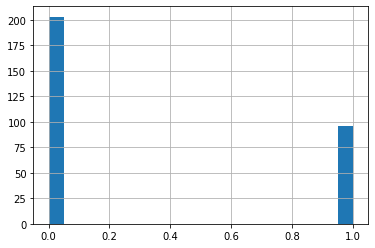

In [ ]:
df_hf.smoking.hist(bins=20), df_hf.smoking.describe()

In [ ]:
sum([1 for i in (df_hf.smoking == 1) if i]), df_hf.shape[0], sum([1 for i in (df_hf.smoking == 1) if i]) / df_hf.shape[0] 

(96, 299, 0.3210702341137124)

Links de donde se obtuvo la información para hacer los datos sintéticos.

* http://www.fnr.gub.uy/info_diabetes

  http://www.scielo.edu.uy/scielo.php?script=sci_arttext&pid=S2301-12542017000100007

* https://www.elpais.com.uy/informacion/salud/hipertension-asesina-silenciosa-ataca-uruguayos.html

* https://es.wikipedia.org/wiki/Estatura

* https://es.wikipedia.org/wiki/Peso_del_cuerpo_humano

* https://www.gub.uy/ministerio-salud-publica/sites/ministerio-salud-publica/files/documentos/noticias/Informe%20preliminar%20de%20mortalidad%20global%20enero-julio.pdf

In [ ]:
from faker.providers import BaseProvider

# create new provider class
class MyProvider(BaseProvider):
    def age(self) -> int:
        return max([int(np.random.normal(loc=50, scale=10, size=None)),18])

    def weight(self) -> int:
        return int(np.random.beta(5, 2.17, size=None)*100)

    def height(self) -> int:
        return int(np.random.normal(loc=167, scale=25, size=None))

    def sports(self) -> int:
      return np.random.choice([0, 1, 2], size=None, p=[1-0.53, 2*0.53/3, 0.53/3])

    def smoke(self) -> int:
      return np.random.choice([0, 1], size=None, p=[2/3, 1/3])

    def risk_activity(self) -> int:
      return np.random.choice([0, 1], size=None, p=[9/10, 1/10])
      
    def high_pressute(self) -> int:
      return np.random.choice([0, 1], size=None, p=[1/3, 2/3])

    def card_records(self) -> int:
      return np.random.choice([0, 1], size=None, p=[1-0.001, 0.001])

    def diabetes(self) -> int:
      return np.random.choice([0, 1], size=None, p=[1-0.083, 0.083])

In [ ]:
  fake.add_provider(MyProvider)

In [ ]:
columns = {
    'name':'str', 'age':'int', 'weight':'int', 'height':'int', 'sports':'int', 'smoke':'int', 'risk_activity':'int', 'high_pressute':'int', 'card_records':'int', 'diabetes':'int'
}


df_syn = pd.DataFrame(columns=columns)

In [ ]:
fake.name(),fake.age(), fake.weight(), fake.height(), fake.sports(), fake.smoke(), fake.risk_activity(), fake.high_pressute(), fake.card_records(), fake.diabetes()

('Frank Ritter', 36, 88, 157, 0, 0, 0, 1, 0, 0)

Se genera un dataset de 1000 instancias random.

In [ ]:

for i in range(1000):
  data = (fake.name(),fake.age(), fake.weight(), fake.height(), fake.sports(), fake.smoke(), fake.risk_activity(), fake.high_pressute(), fake.card_records(), fake.diabetes())
  df_syn = df_syn.append(pd.DataFrame([list(data)], columns=columns))

Visualizamos las distribuciones de los datos para corroborar que tienen sentido.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ad5177dd0>,
      dtype=object)

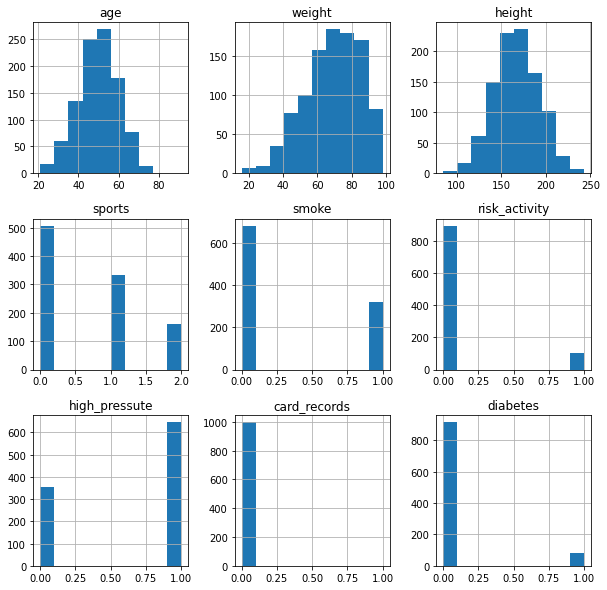

In [ ]:
df_syn.drop(axis=0, columns='name').reset_index(drop=True).astype('int').hist(figsize=(10,10))

## KMEANS

Aplicamos Kmeans para clusterizar los datos. La idea sería generar clusters y luego, al interpretar que tipo de instancias se agrupaban en cada uno, poder definir a que clusters se cree que se le deberían solicitar examenes extra.

### Buscamos mejor cluster

In [ ]:
df_syn = df_syn.drop(axis=0, columns='name').dropna()

In [ ]:
scaler = MinMaxScaler()
data = scaler.fit_transform(df_syn.values)

In [ ]:
inertias = []
silhouettes = []
for i in range(3,20):
  kmeans = KMeans(n_clusters=i, max_iter=500, algorithm='auto') 
  kmeans.fit(data)
  inertias += [kmeans.inertia_]
  silhouettes += [silhouette_score(data,kmeans.labels_)]

inertias = [inertias[0]]*2 + inertias
silhouettes = [silhouettes[0]]*2 + silhouettes

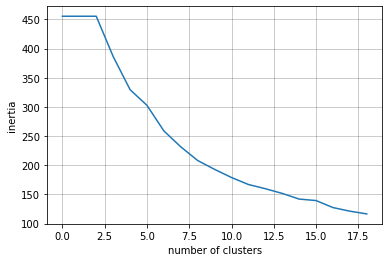

In [ ]:
plt.plot(inertias)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.grid(color='k', linestyle='-', linewidth=0.5, alpha=0.4)
plt.show()

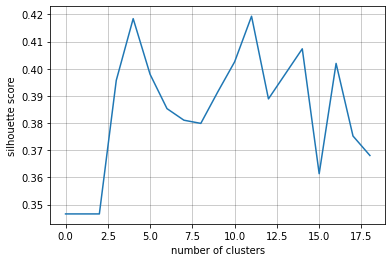

In [ ]:
plt.plot(silhouettes)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.grid(color='k', linestyle='-', linewidth=0.5, alpha=0.4)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=8, max_iter=500, algorithm='auto') 
kmeans.fit(data), kmeans.inertia_

(KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
        n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0), 231.58289555773624)

In [ ]:
cluster = []
for instance in data:

  cluster += [kmeans.predict(instance.reshape(-1, len(instance)))]

df_syn['Prediction'] = [i[0] for i in cluster]

### Visuzalizamos los resultados

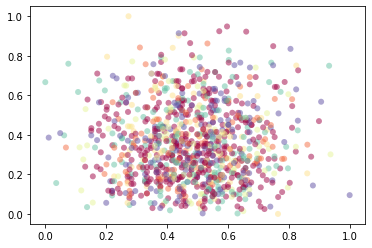

In [ ]:
components = 2
pca = PCA(n_components=components)
pca.fit(df_syn.values)
data_PCA_2comp = pca.transform(df_syn.values)

scaler = MinMaxScaler()
data_PCA_2comp = scaler.fit_transform(data_PCA_2comp)

plt.scatter(data_PCA_2comp[:,0], data_PCA_2comp[:,1], c=df_syn['Prediction'], edgecolor='none', alpha=0.5,
              cmap=plt.cm.get_cmap('Spectral', 6))

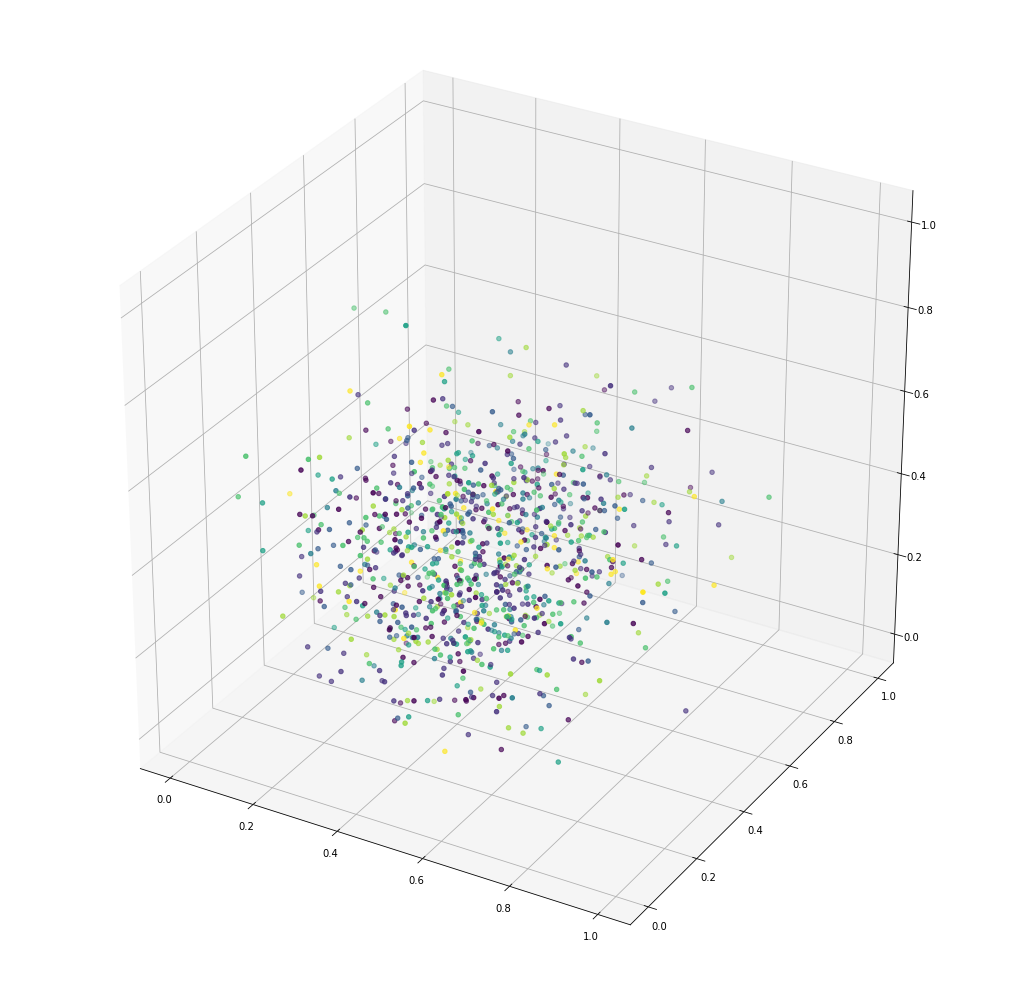

In [ ]:
%matplotlib inline
components = 3
pca = PCA(n_components=components)
pca.fit(df_syn.values)
data_PCA_3comp = pca.transform(df_syn.values)

scaler = MinMaxScaler()
data_PCA_3comp = scaler.fit_transform(data_PCA_3comp)

fig = plt.figure(figsize=(18,18))
ax = plt.axes(projection='3d')

ax.scatter3D(data_PCA_3comp[:,0], data_PCA_3comp[:,1], data_PCA_3comp[:,2], c=df_syn['Prediction'], cmap='viridis');

Vemos graficamente que no hay una correcta separacion de los clusters.

In [ ]:
df_syn.astype('float').groupby(by='Prediction').mean()

,age,weight,height,sports,smoke,risk_activity,high_pressute,card_records,diabetes
Prediction,,,,,,,,,
0.0,49.342697,68.842697,168.235955,0.000000,0.000000,0.000000,1.000000,0.005618,0.000000
1.0,49.225000,68.895000,165.160000,0.670000,1.000000,0.000000,1.000000,0.000000,0.060000
2.0,50.289474,69.070175,167.517544,0.000000,0.000000,0.035088,0.000000,0.000000,0.000000
3.0,48.049383,65.728395,167.308642,0.703704,0.246914,1.000000,1.000000,0.000000,0.098765
4.0,49.340000,70.740000,165.570000,0.610000,1.000000,0.060000,0.000000,0.000000,0.080000
5.0,50.430380,69.107595,167.284810,1.310127,0.000000,0.000000,1.000000,0.000000,0.000000
6.0,47.573913,68.269565,166.200000,1.373913,0.000000,0.095652,0.000000,0.000000,0.000000
7.0,51.777778,68.481481,165.814815,0.648148,0.000000,0.018519,0.555556,0.000000,1.000000


### Resumen de los resultados

Es claro ver que Kmeans falla al separar los datos. No pareciese haber una separación lógica de las instancias. Esto se puede ver incluso graficamente.

Si intentamos analizar los clusters a partir de la distribución de sus puntos, estas son muy similares. No parece que el modelo generalice de forma correcta.

## DBSCAN

Se continua con el approach anterior y se intenta buscar otras técnicas de clusterización.

### Buscamos mejor Cluster

In [ ]:
df_syn = df_syn.drop(axis=0, columns='Prediction')

In [ ]:
data_dbscan = df_syn.values
scaler = MinMaxScaler()
data_dbscan = scaler.fit_transform(data_dbscan)

Utilizamos NearestNeighbors para estimar el eps adecuado para el moedelo.

In [ ]:

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_dbscan)
distances, indices = nbrs.kneighbors(data_dbscan)

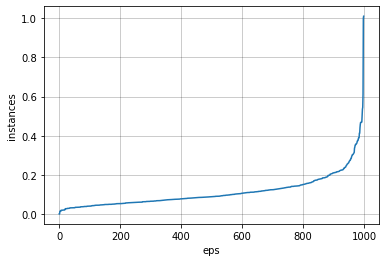

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('eps')
plt.ylabel('instances')
plt.grid(color='k', linestyle='-', linewidth=0.5, alpha=0.4)

In [ ]:
clustering = DBSCAN(eps=0.20, min_samples=10, p=4).fit(data_dbscan)
labels = clustering.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data_dbscan, labels))

Estimated no. of clusters: 13
Estimated no. of noise points: 324
Silhouette Coefficient: 0.147


Aplicamos el modelo y vemos la cantidad de puntos no clasificados y la cantidad de clusters.

Tener 1/3 de los puntos sin clasificar no resulta alentador. De todas formas, como los datos se generaron de forma aleatoria esto podría ser entendible.

### Visualizamos los resultados

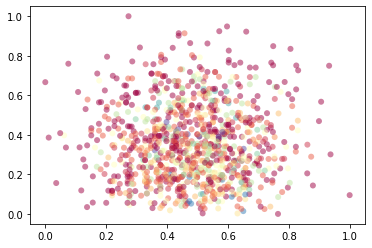

In [ ]:
components = 2
pca = PCA(n_components=components)
pca.fit(df_syn.values)
data_PCA_2comp = pca.transform(df_syn.values)

scaler = MinMaxScaler()
data_PCA_2comp = scaler.fit_transform(data_PCA_2comp)

plt.scatter(data_PCA_2comp[:,0], data_PCA_2comp[:,1], c=labels, edgecolor='none', alpha=0.5,
              cmap=plt.cm.get_cmap('Spectral', 13))

Vemos que el modelo no logra separar en clusters adecuadamente

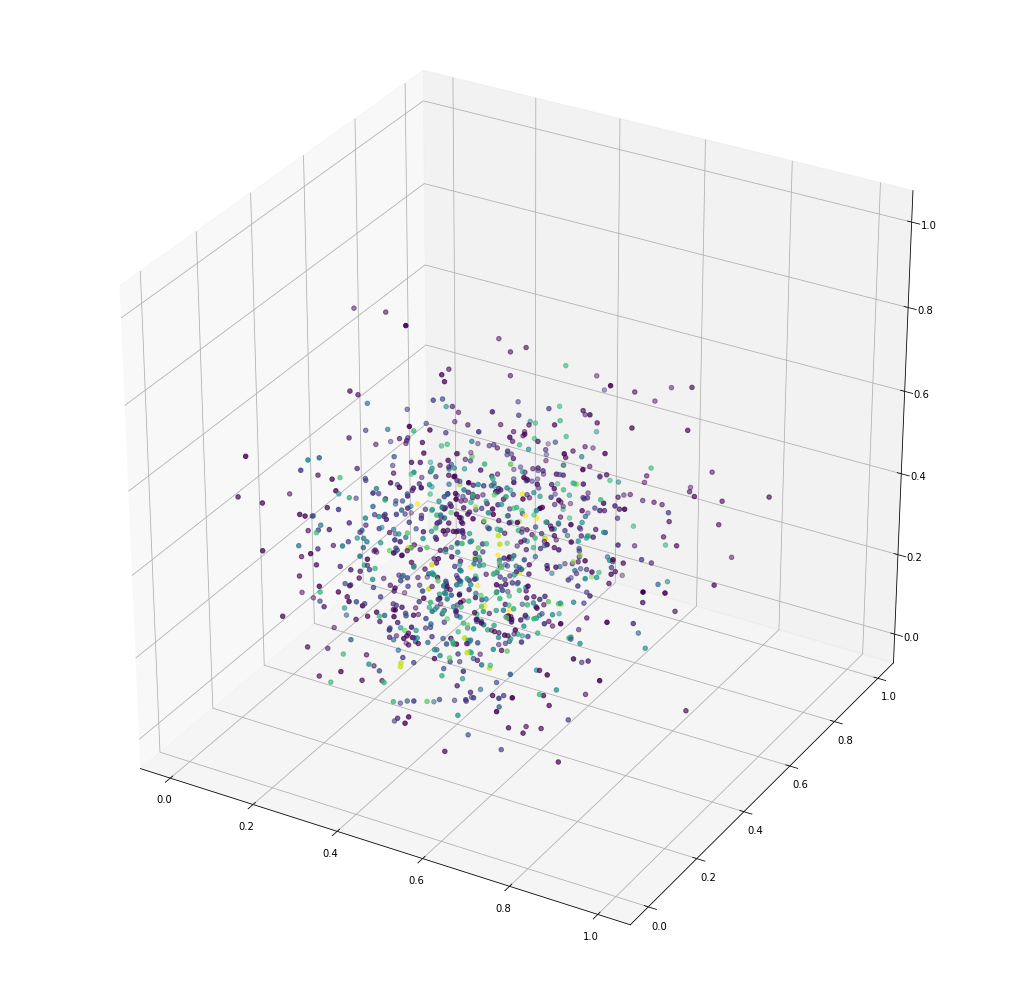

In [ ]:
%matplotlib inline

df_syn['Prediction'] = labels

components = 3
pca = PCA(n_components=components)
pca.fit(df_syn.values)
data_PCA_3comp = pca.transform(df_syn.values)

scaler = MinMaxScaler()
data_PCA_3comp = scaler.fit_transform(data_PCA_3comp)

fig = plt.figure(figsize=(18,18))
ax = plt.axes(projection='3d')

ax.scatter3D(data_PCA_3comp[:,0], data_PCA_3comp[:,1], data_PCA_3comp[:,2], c=df_syn['Prediction'], cmap='viridis');

In [ ]:
df_syn.astype('float').groupby(by='Prediction').mean()

,age,weight,height,sports,smoke,risk_activity,high_pressute,card_records,diabetes
Prediction,,,,,,,,,
-1.0,49.033951,64.231481,168.688272,1.037037,0.401235,0.253086,0.518519,0.003086,0.253086
0.0,51.601942,70.067961,167.902913,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.0,49.604651,69.494186,167.732558,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2.0,47.860000,74.540000,163.600000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
3.0,46.185185,72.962963,164.925926,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4.0,54.764706,78.852941,168.617647,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5.0,49.068627,69.794118,164.313725,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
6.0,44.200000,79.300000,164.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
7.0,50.433333,69.100000,164.044444,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000


### Resumen de los resultados

Es claro ver que DBSCAN falla al separar los datos. No pareciese haber una separación lógica de las instancias. Esto se puede ver incluso graficamente.

Si intentamos analizar los clusters a partir de la distribucion de sus puntos, estas son muy similares. No parece que el modelo generalice de forma correcta.

Tiene un comportamiento similar a Kmeans.

## Etiquetado de los datos

Luego de ver que los metodos de clusterización fallaron, se propone la idea de etiquetar los resultados. 

En primer lugar, es importante aclarar que no se encontró manera de vincular las respuestas del formulario con las features del dataset original del trabajo (salvo un par de respuestas). Por ende, no pudimos utilizar esa información para reconocer potenciales clientes con riesgo a partir de las respuestas del formulario.

En segundo lugar, es importante aclarar que al etiquetar los datos nosotros mismos, estamos de cierta forma forzando un modelo. Es decir, si los etiquetamos de forma aleatoria, no estaríamos dandole al modelo información certera. Si los etiquetamos evaluando la instancia, de cierta forma estamos determinando cual es el modelo predictivo. Es decir, si las personas de mas de 60 años se consideran de riesgo, luego nuestro modelo sería un árbol de una sola hoja que parte los datos en 2 según la edad. De complejizar la decisión de si la instancia requiere analisis o no, estamos complijizando el modelo. Pero como ese modelo lo estaríamos diseñando nosotros mismos, no tendría sentido utilizar técnias de ML para poder realizar un modelo que se ajuste a los datos. Bastaría con etiquetar las instancias nuevas con la misma lógica que se etiqueto a las instancais sinteticas. Ademas, en caso de realizar el approach del etiquetado utilizando probabilidades, valdría el mismo analisis.

También es imoprtante agregar que se podría realizar un modelo más complejo o mas realista, o de cierta forma que vincule la información que tenemos de primer dataset con las respuestas al cuestionario. Es decir, quizas las personas que tiene una enfermedad terminal suelen tener niveles bajos de plaquetas por ejemplo. Sin embargo, esa información resulta ajena a nosotros. 

Por ende, la decisión del equipo seria consultar a los expertos de la empresa para poder tomar una decisión más acertada. La hoja de ruta sería o bien solicitarle que etiqueten instancias sintéticas para que se pueda entrenar un modelo, o bien pedirles que participen de un analisis de los datos en conjunto para que puedan aportar información especifica de su dominio de conocimiento y así poder vincular las respuestas del formulario con el primer set de datos.

In [ ]:
df_syn

,age,weight,height,sports,smoke,risk_activity,high_pressute,card_records,diabetes,Prediction
0,57,23,171,0,0,0,1,0,0,1
0,48,94,163,0,0,0,0,0,0,0
0,44,95,143,0,0,0,1,0,0,1
0,55,41,182,0,0,1,1,0,0,-1
0,37,62,182,0,1,0,1,0,0,7
...,...,...,...,...,...,...,...,...,...,...
0,45,46,172,0,1,0,1,0,0,7
0,55,77,145,1,0,0,0,0,0,3
0,63,76,138,1,0,0,1,0,0,5
0,54,91,122,0,1,0,1,0,0,7


In [ ]:
df_syn = df_syn.drop(axis=0, columns='Prediction')

Dicho lo anterior, de todas formas realizaremos un etiquetado a maquina para presentar un modelo.

Definimos que las personas que requieren examenes extras son los adultos mayores (mayores de 60 años), las personas con obesidad (IMC > 30) o que sufran de alguna enfermedad crónica.

Veremos como al realizar este tipo de etiquetado se cumplirá lo dicho anteriormente. Resulta muy facil etiquetar nuevas instancias sin utilizar tecnicas de ML. Bastaría solo con clasificarlas de acuerdo a la siguiente función.

In [ ]:
def need_eval(person):
  if person.age > 60:
    return 1
  
  if person.weight / (person.height**2) > 30:
    return 1

  return 1 if (person.high_pressute == 1 or person.card_records == 1 or person.diabetes == 1) else 0


In [ ]:
df_syn['EVAL'] = df_syn.apply(axis=1, func=lambda x : need_eval(x))

In [ ]:
df_syn

,age,weight,height,sports,smoke,risk_activity,high_pressute,card_records,diabetes,EVAL
0,57,23,171,0,0,0,1,0,0,1
0,48,94,163,0,0,0,0,0,0,0
0,44,95,143,0,0,0,1,0,0,1
0,55,41,182,0,0,1,1,0,0,1
0,37,62,182,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
0,45,46,172,0,1,0,1,0,0,1
0,55,77,145,1,0,0,0,0,0,0
0,63,76,138,1,0,0,1,0,0,1
0,54,91,122,0,1,0,1,0,0,1


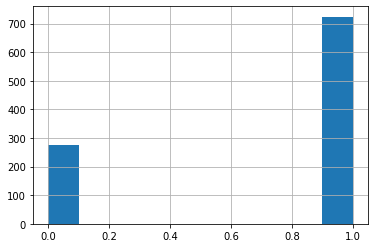

In [ ]:
df_syn['EVAL'].hist()

### Logistic Regression

De todas formas, utilizamos un modelo de Regresión Logística para clasificar las instancias a partir de la etiqueta puesta a mano.

In [ ]:
df_train, df_test = train_test_split(df_syn, test_size=0.2)
n_features = 9
X_train = df_train.drop(axis = 0, columns= 'EVAL')
X_test = df_test.drop(axis = 0, columns= 'EVAL')
Y_train = df_train['EVAL']
Y_test = df_test['EVAL']

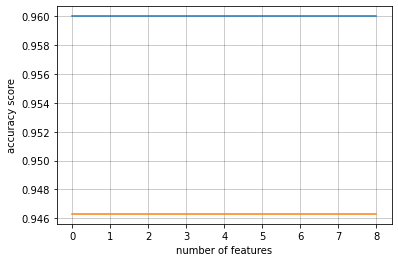

[0.96, 0.96, 0.96, 0.96, 0.96, 0.96]

In [ ]:
acu = []
rec= []

model = LogisticRegression(class_weight='balanced', max_iter=500, solver='liblinear', penalty='l2')

for i in range(3, n_features):
  
  selector = SelectKBest(chi2, k=i)
  pipe = Pipeline([('fselector', selector), ('lr', model)])
  pipe.fit(X_train, Y_train)
  new_Y_pewd = pipe.predict_proba(X_test)
  Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
  res = get_scores(Y_pred, new_Y_pewd, Y_test,False)
  acu += [res[0]]
  rec += [res[1]]

plt.plot([acu[0]]*3+acu)
plt.plot([rec[0]]*3+rec)
plt.xlabel('number of features')
plt.ylabel('accuracy score')
plt.grid(color='k', linestyle='-', linewidth=0.5, alpha=0.4)
plt.show()
acu

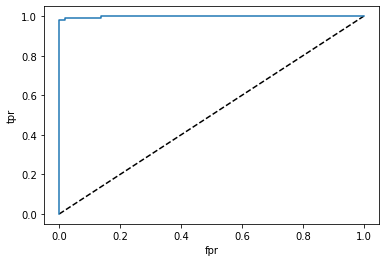

AUC: 0.9988156336360048
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        51
           1       1.00      0.95      0.97       149

    accuracy                           0.96       200
   macro avg       0.93      0.97      0.95       200
weighted avg       0.97      0.96      0.96       200



('Accuracy/Recall', (0.96, 0.9463087248322147))

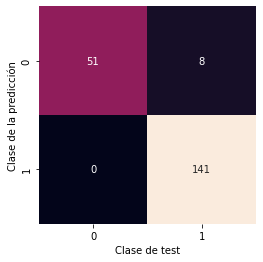

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=500, solver='liblinear')

pipe = Pipeline([('fselector', SelectKBest(chi2, k=6)), ('lr', model)])
pipe.fit(X_train, Y_train)
new_Y_pewd = pipe.predict_proba(X_test)

# new_Y_pewd = model.predict_proba(X_test)
umbral_prob = 0.5
Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
'Accuracy/Recall', get_scores(Y_pred, new_Y_pewd, Y_test,True)

Vemos que el modelo funciona de maravilla, lo que era predecible por como esstaban etiquetado los datos.

# CONCLUSIONES

Luego de realizar el trabajo podríamos decir que se cumplió con la mayoría de los objetivos.

En primer lugar, luego de un profundo EDA del dataset original, fuimos capaces de entender el problema y la distribucion de los datos. En este caso, no hubo mayores comlicaciones. No habían datos nulos o muchos outliers. 

Sin embargo, en general, la distribución de la mayoría de los features era similar tanto para los pacientes con riesgo de muerte como para auqellos que no lo tenían, lo que complejizo la tarea. Ademas, la cantidad de instancias era bastante baja. Esto dificulto el uso de los datos luego.

---

Pasando a la *PARTE 2*, utilizamos distintos modelo para poder encontrar algun tipo de conexión entre los features. Si bien ya conociamos las correlaciones, resultaba interesante ir mas a fondo e indagar un poco más.

El modelo de Kmeans resulto bastante malo. Por lo tanto, se descartaron los resultados provenientes de este. A futuro, podría resultar interesante utilizar mas clusters para intentar obtener mejores reultados. Aunque las métricas indicaban que esa cantidad de clusters era la optima. 

Luego de ver estos resultados no tan buenos del modelo Kmeans, utilizamos 2 estrategias distintas para ver si los resultados mejoraban. 
Realizamos regresiones logísticas utlizando Chi2 selector y RFE para seleccionar los atributos más importantes. Con ambas estrategias los resultados fueron muy buenos, obteniendo un accuracy del 92% y 90% respectivamente. Ademas, con los 2 caminos que tomamos, los atributos utilizados por el modelo fueron los mismos 6, lo cual fue muy bueno para el analisis de la parte siguiente.

---

Luego, a partir de esa conexión entre los distintos features encontradas utilizando SelectKBest y RFE, pudimos identificar que campo seria crucial conocer para poder predecir los DEATH_EVENT con una alta precisión. Por ende, se investigo que tipo de analisis se podrian hacer para conocer esos valores y cual era su costo. De esta forma, se determino que, considerando su costo y su facilidad, eran todos recomendados. Una vez que se tuviesen los resultados de estos analisis, sería sencillo predecir si el paciente sufriria un DEATH_EVENT.

---

Finalmente, comenzamos con la generación de datos sintéticos para simular respuestas a formularios. Como se comento, estos datos fueron generados de forma sumamente genérica. A futuro, una posible mejora sería poder contactar especialistas o gente con muy buenos datos para poder generar datos sintéticos mas realistas, donde las distribuciones de los features esten correlacionadas entre ellas. Otra alternativa podría ser buscar set de datos reales que contengan la información incluida en el formulario para poder entrenar los modelos. Sin embargo, no se encontro un dataset del estilo con datos de uruguay y se desconoce que tan distitnos pueden ser los datos de otros países.

Luego, se intento utilizar técnicas de clusterización para agrupar los datos e intentar identificar a que grupos se le solicitaría realizar analisis extras. Se utilizo Kmeans y DBSCAN. No obstante, ambos modelos fallaron. Seguramente esto se debe a la aleatoriedad de los datos y a la poca correlación entre sus features.

Por lo tanto, se realizó un approach basado en etiquetar los datos. Como se explicó en la *PARTE 4*, esto es un tanto engañoso, ya que se esta creando a mano el modelo. De todas formas, se realizó y se entreno el modelo obteniendo muy buenos resultados. 

La recomendación en cuanto a este punto seria continuar una investigación más específica del área para poder utilizar la información del dataset original para la predicción. Para ello sería necesaría la participación de profesionales del área para vincular los distintos features o para poder orientarnos en que tipo de relaciones buscar. 